### Import Images, PIL.Image.Ops, requests and io to display image of TIPS

In [1]:
from PIL import Image
import PIL.ImageOps  
import requests
import io

imgUrl = "https://raw.githubusercontent.com/karolinaszafranbelzowska/tips-dataset-analysis/master/tips.jpg"
# image taken from google (https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.kochiesbusinessbuilders.com.au%2Fwp-content%2Fuploads%2F2019%2F02%2Ftips.jpg&imgrefurl=https%3A%2F%2Fwww.kochiesbusinessbuilders.com.au%2Ffive-tips-for-marketing-your-small-business-in-2019%2F&docid=2rleLalxFo86aM&tbnid=tF1r-oTC0FiKPM%3A&vet=10ahUKEwji-prTz4jmAhUQTsAKHXouAm4QMwhKKAkwCQ..i&w=660&h=450&bih=969&biw=1920&q=tips%20image&ved=0ahUKEwji-prTz4jmAhUQTsAKHXouAm4QMwhKKAkwCQ&iact=mrc&uact=8)
r = requests.get(imgUrl, stream=True)
img = Image.open(io.BytesIO(r.content))

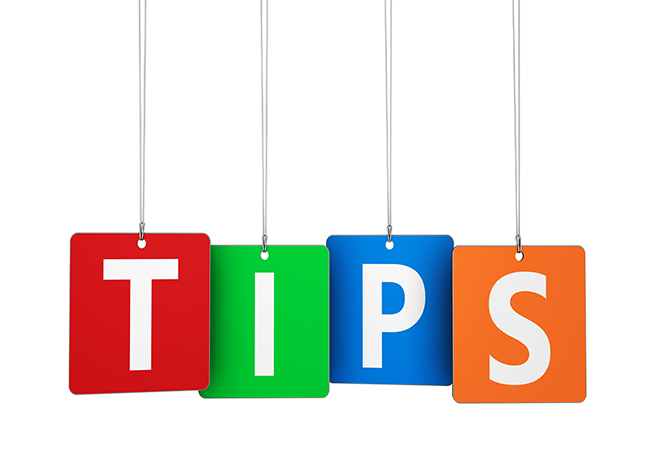

In [2]:
img

### Import pandas, numpy, seaborn and matplotlib.pyplot

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the **tips** dataset from URL
### Taken from : **https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv**

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

 **pd.read_csv** function reads a csv file from the URL

In [5]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Description of the tips dataset 

#### There are 244 rows and 7 columns
Each row describes each customer in a restaurant whereas each column describes 7 different features. **First** column shows "Total_bill", **Second** column: "Tip", **Third** column: "Sex", **Fourth** column: "Smoker", **Fifth** column: "Day", **Sixth** column: "Time" and **Seventh** column: "Size".

The dataset contains tips data from different customers .females and males, smokers and non smokers. As we can see data also contains information on specific days (Thursday to Sunday), time of meal (dinner or lunch) and different tables size.

### Some statistics of the tips-dataset

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


**Groupby** operation will show group of amounts of data and compute operations on these groups.

In [9]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


Below, I try to group the data by day and table size. I used Pandas **dropna()** method which allows to analyze and drop Rows/Columns with Null values in different ways.

In [10]:
df2= df.groupby(['day','size']).sum()
df2['percent'] = df2['tip']/df2['total_bill']*100
df2.dropna() 

total_bill     tip    percent
day  size                               
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774

Using the groupby operation I try to find out what is the best day to work – maximum tips.

In [11]:
df3 = df.groupby('day').sum() 
df3.drop('size',inplace=True,axis=1) 
df3['percent'] = df3['tip']/df3['total_bill']*100

In [12]:
df3

,total_bill,tip,percent
day,,,
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791
Thur,1096.33,171.83,15.673201


### Scatterplot Matrix

A **scatterplot Matrix** is a collection of scatterplots organized into  a grid.
Each scatterplot shows the relationship between a pair of variables. Below I used four variables: "sex", "smoker", "day" and "time" and they are compared with "total_bill", "tip" and "size".

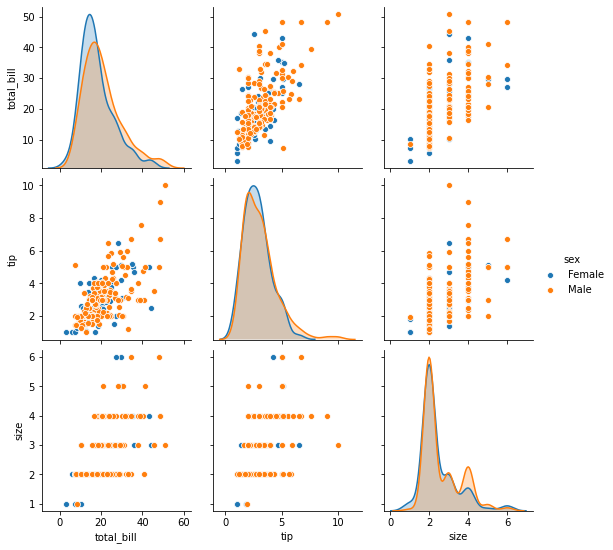

In [13]:
sns.pairplot(df, hue="sex")

In [14]:
df['sex'].describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

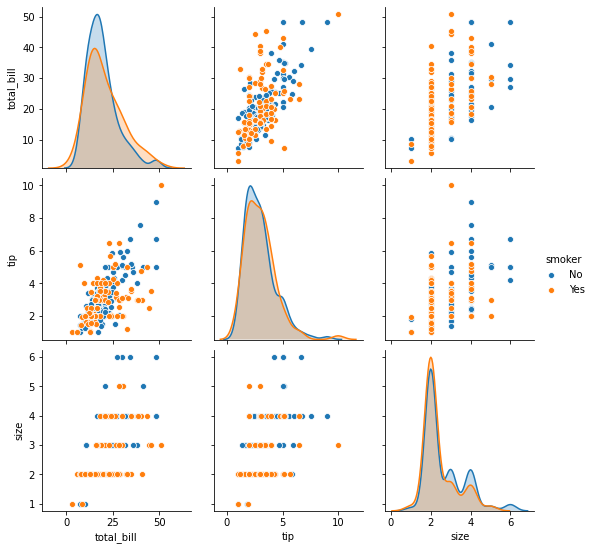

In [15]:
sns.pairplot(df, hue="smoker")

In [16]:
df['smoker'].describe()

count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

C:\Users\karolina\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


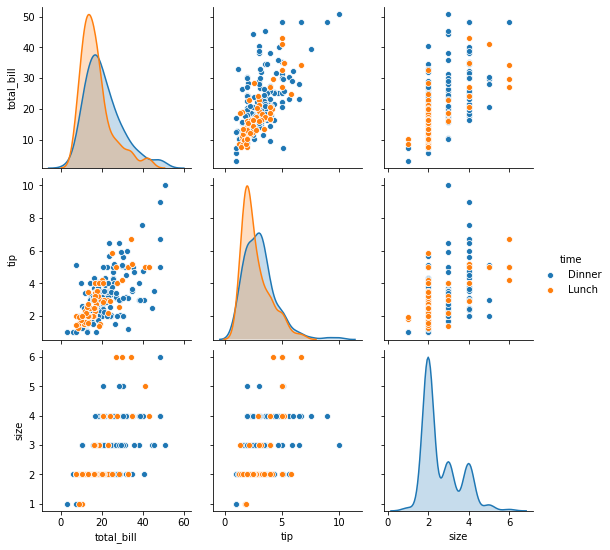

In [17]:
sns.pairplot(df, hue="time")

In [18]:
df['time'].describe()

count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

C:\Users\karolina\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\karolina\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


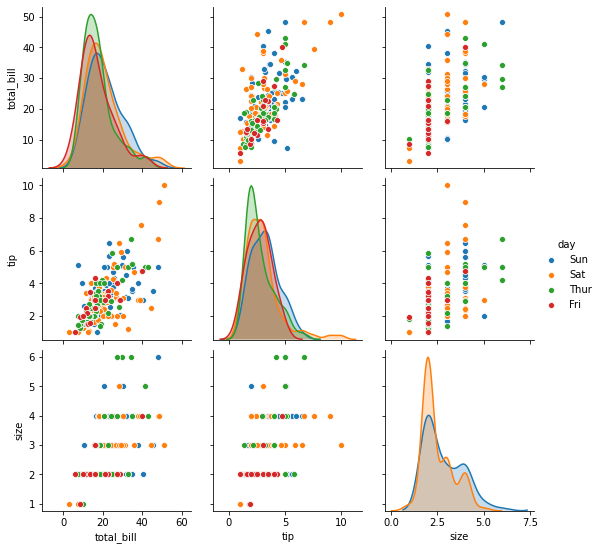

In [19]:
sns.pairplot(df, hue="day")

In [20]:
df['day'].describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

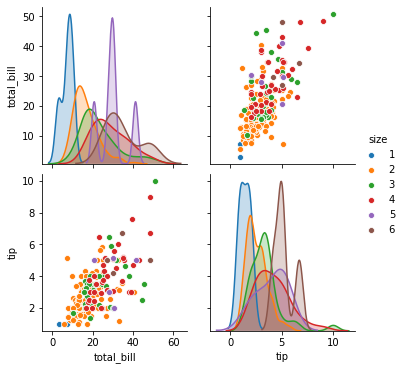

In [21]:
sns.pairplot(df, hue="size")

In [22]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

### Scatter plot

In [23]:
df[['total_bill', 'sex']].head()

,total_bill,sex
0,16.99,Female
1,10.34,Male
2,21.01,Male
3,23.68,Male
4,24.59,Female


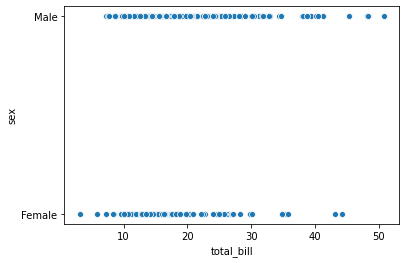

In [24]:
sns.scatterplot(x='total_bill',y='sex',data=df)

In [25]:
df[['total_bill', 'tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


Below I drew a simple scatter plot between two variables: **total_bill** and **tip**

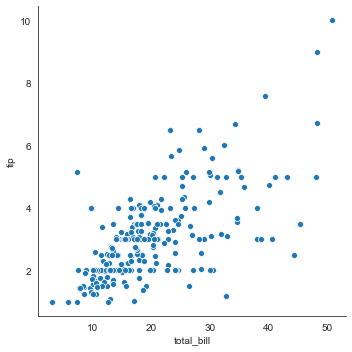

In [26]:
sns.set_style("white")
tips = sns.load_dataset("tips")              
sns.relplot(x="total_bill", y="tip", data=tips);

The next plot compares three parameters: **total_bill**, **tip** and **sex**. _Hue_ in this case can be eighter numeric or categorical. Here is categorical: Male and Female. I selected three columns with these parameters and I used head() method. This variables shows groups with different colors:

In [27]:
df[['total_bill', 'tip', 'sex']].head()

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


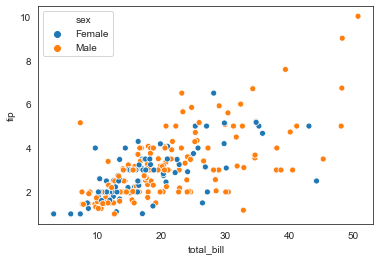

In [28]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=df)

Below, I added up the fourth column **smoker**

In [29]:
df[['total_bill', 'tip','sex', 'smoker']].head()

,total_bill,tip,sex,smoker
0,16.99,1.01,Female,No
1,10.34,1.66,Male,No
2,21.01,3.50,Male,No
3,23.68,3.31,Male,No
4,24.59,3.61,Female,No


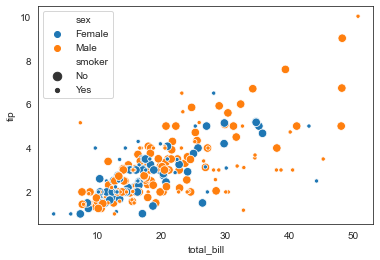

In [30]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',size='smoker',data=df)

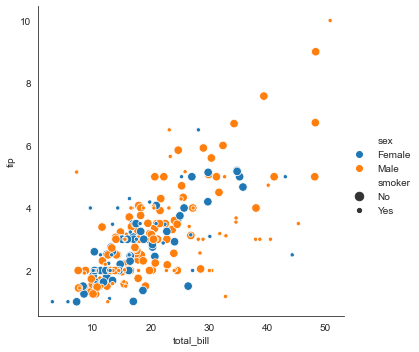

In [31]:
sns.relplot(x='total_bill',y='tip',hue='sex',size='smoker',data=df)

Another variable added: **day**

In [32]:
df[['total_bill', 'tip','sex', 'smoker', 'day']].head()

,total_bill,tip,sex,smoker,day
0,16.99,1.01,Female,No,Sun
1,10.34,1.66,Male,No,Sun
2,21.01,3.50,Male,No,Sun
3,23.68,3.31,Male,No,Sun
4,24.59,3.61,Female,No,Sun


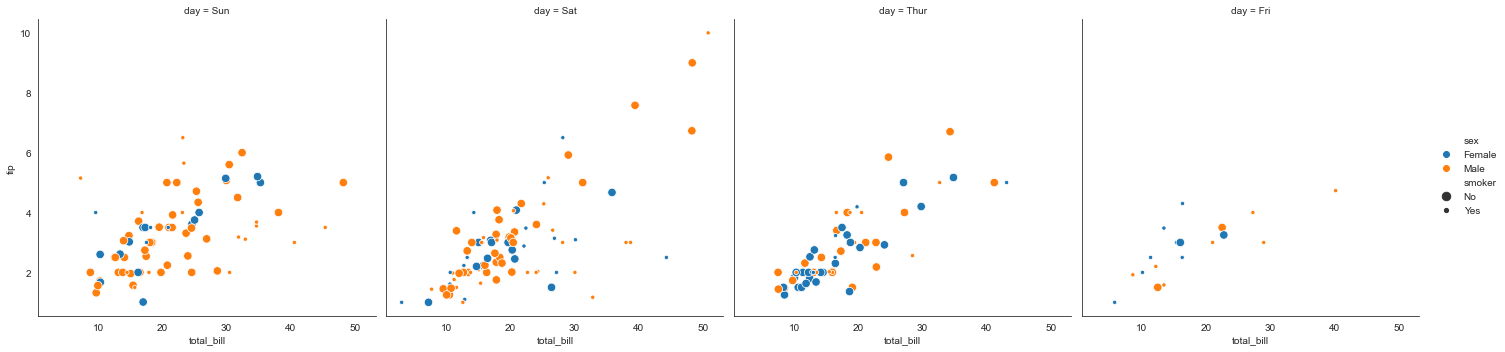

In [33]:
sns.relplot(x='total_bill',y='tip',hue='sex',size='smoker',col='day',data=df)

Another one: **time**

In [34]:
df[['total_bill', 'tip','sex', 'smoker', 'day', 'time']].head()

,total_bill,tip,sex,smoker,day,time
0,16.99,1.01,Female,No,Sun,Dinner
1,10.34,1.66,Male,No,Sun,Dinner
2,21.01,3.50,Male,No,Sun,Dinner
3,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner


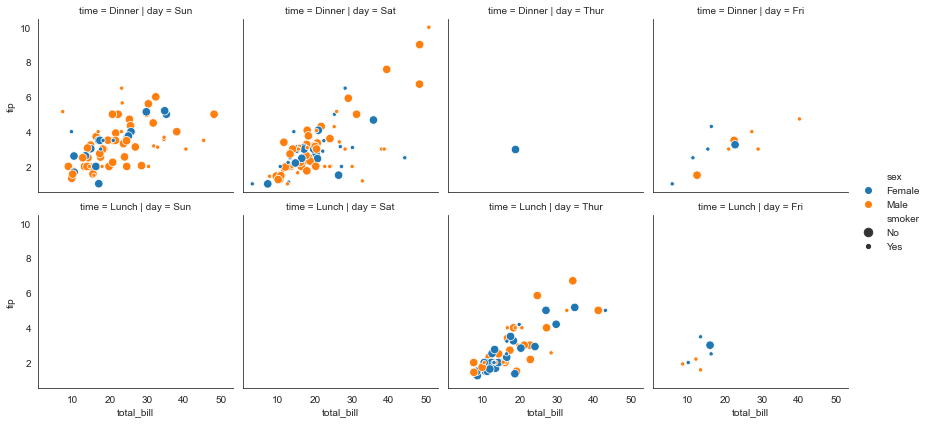

In [35]:
sns.relplot(x='total_bill',y='tip',hue='sex',size='smoker',col='day',row='time',height=3,data=df)

### Some statistics of smokers 

In [36]:
s = df.loc[df.loc[:,'smoker'] == 'Yes']

In [37]:
s

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2


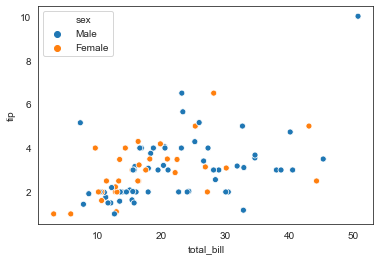

In [38]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=s)

In [39]:
s.describe()

,total_bill,tip,size
count,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602
std,9.832154,1.401468,0.810751
min,3.070000,1.000000,1.000000
25%,13.420000,2.000000,2.000000
50%,17.920000,3.000000,2.000000
75%,26.860000,3.680000,3.000000
max,50.810000,10.000000,5.000000


### Some statistics of non-smokers

In [40]:
n = df.loc[df.loc[:,'smoker'] == 'No']

In [41]:
n

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


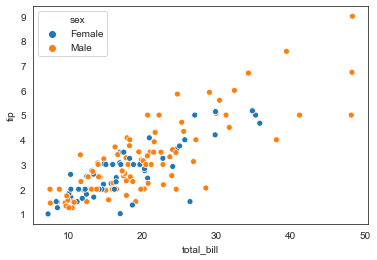

In [42]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=n)

In [43]:
n.describe()

,total_bill,tip,size
count,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874
std,8.255582,1.377190,1.017984
min,7.250000,1.000000,1.000000
25%,13.325000,2.000000,2.000000
50%,17.590000,2.740000,2.000000
75%,22.755000,3.505000,3.000000
max,48.330000,9.000000,6.000000


There are 93 rows of YES-smokers which means 93 people were smoking during their lunch or dinner and 151 rows of NO-smokers.
Mean **total_bill** for YES-smoking people is nearly 21 dol, whereas the mean for NO-smoking is 19 dol. It's worth to write that mean for all people is nearly 20 dol. (19.78). 

### Both variables (smokers and non-smokers) in plots with categorical data

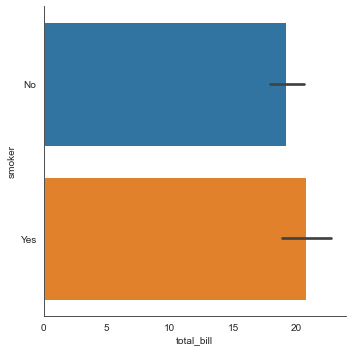

In [44]:
sns.catplot(x="total_bill",y="smoker",kind='bar',data=df)

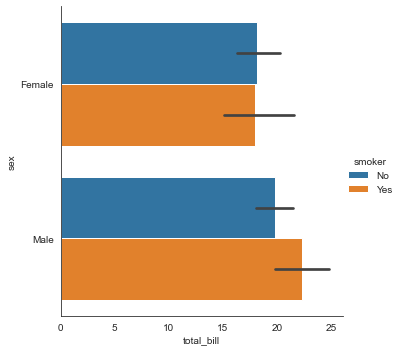

In [45]:
sns.catplot(x="total_bill",y="sex",kind='bar',hue='smoker',data=df)

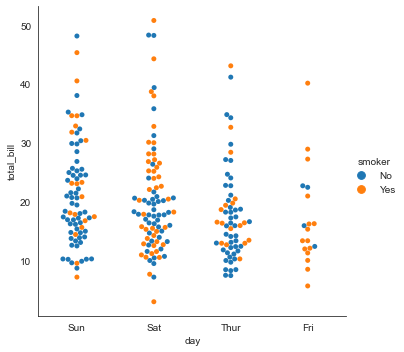

In [46]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=df);

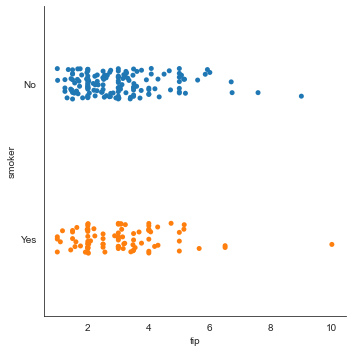

In [47]:
sns.catplot(x="tip",y="smoker",data=df)

Using groupby operation I try to find out who eats more (and tips more): smokers or non smokers?

In [48]:
df4 = df.groupby('smoker').sum()
df4['percent'] = df4['tip']/df4['total_bill']*100

In [49]:
df4

,total_bill,tip,size,percent
smoker,,,,
No,2897.43,451.77,403,15.592094
Yes,1930.34,279.81,224,14.495374


### Summary

1. **244** people were in the restaurant (I'm guessing it's a restaurant) where 157 of them were Male and 87 Female.
2. 151 of all were not smoking during the visit and 93 were smoking. 33 of Female were smoking whereas 54 not and 60 of Male were smoking whereas 97 not.
3. 176 people came for dinner and 68 for lunch. There is not such as breakfast time in this data-set.
4. 87 people were eating on Saturday, 76 on Sunday, 62 on Thursday and just 19 on Friday. It means restaurant was very busy on Saturdays whereas Fridays were very quiet and groupby operation shows that very accurately.
5. Size describes how many seats they had by the table. The mean shows that it was more than 2 seats. Maximum was 6 seats and minimum 1. Standard deviation is 0,95 which shows the distance from the mean. Here is some spread but it's not very high and it indicates that the data are less spread out.
6. The biggest total_bill was paid by Male and it was 50.81 dol. and he/she tipped 10 dol. which was 20% of total_bill. It was on Saturday at the Dinner time and there were only 3 seats occupied. He orshe also was smoking person.
7. There were 4 bills which had 6 people by the table each. Three of them had total_bills around 30 dol. each and one had total_bill for 48.17 dol. Two of them were ordered by Male and 2 by Female.
8. Scatterplot with four variables: total_bill, tip,sex, smoker shows very clearly the bill amount range. The most are bills in the range between 10.00 dol. and 20.00 dol. (130) , there are 65 bills between 20.00 dol. and 30.00 dol., 22 bills between 30.00 and 40.00, 17 bills up to 10.00 dollars and just 10 over 40.00 dollars.
9. The best day to work was Saturday because tips on that day were 260.40 dollars which was around 15% of all bills (**df3**).
10. **Df4** compares smokers and non smokers. The resuts show that non smokers paid more for their meals than smokers which means they tipped more. It was 16% of total_bill.
11. I found out that the most popular were tables with 2 seats. Tables with 2 seats had nearly 900 dollars total_bills on Saturday whereas the same table had 727 dollars on Thursday (**df2**). So, smaller tables are better to serve.

### Regression

In this part of my notebook I will try to analyses wheter there is a relationship between the total_bill and tip amount.
I will use **linear regression** which is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

In [50]:
df[['total_bill', 'tip']]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


Simple linear regression is an approach for predicting a response using a single feature, so I assumed that the two variables are linearly related and I also considered that the tip dataset has a value of response y for every feature x.

**X** as feature vector and it is total_bill

**Y** as response vector and it is tip

In [51]:
X = df[['total_bill']]
Y = df[['tip']]

In [52]:
X.head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [53]:
Y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


and a scatter plot of above dataset looks like:

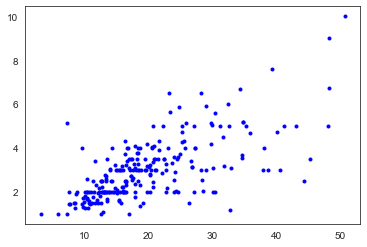

In [54]:
plt.plot(X, Y, 'b.')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=30)

I imported train_test_split to split the data. Test_size = 0.25 which means I put 75% of the data into training set and the rest(25%) of the data into the test set.

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

I had to predict X_test values.

In [57]:
predictions=model.predict(X_test)

and I could compare this prediction with y_test

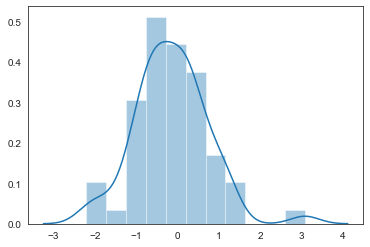

In [58]:
sns.distplot(y_test-predictions)

In conclusion, most of the times the predictions were correct and I can see that there is a positive relationship between total_bill and tip. But also, I noticed that sometimes small bill was related to a bigger tip and big bill to a smaller tip.

# END